## Exploratory Data Analysis of Argentina Car Dataset

### Dataset Description

This data set consists of the following features :


 * **money**: the price of the car
 *  **brand**: the brand of the car
 * **model**: the model of the car
 * **year**: the year of the car
 * **color**: the color of the car
 * **fuel_type**: the fuel type used by the car
 * **door**: the door of the car
 * **gear**: the gear type of the car
 * **motor**: the motor type of the car
 * **body_type**: the body type of the car
 * **kilometers**: the kilometer of the car
 * **currency**: the currency of the price of car


### Task 1: Import the Libraries required for the analysis.

The following libraries are required for the data analysis process:

* **Pandas** - A python library used by Data Scientists and analysts to manipulate, wrangle and explore data.
* **Matplotlib** - A comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. 
* **Scipy** - A scientific Python library used to solve differential equations and carry out statistical work among other functions.
* **Seaborn** - A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os

### Task 2: Importing the Dataset 

In [2]:
for filename in os.listdir('.'):
    if not filename.startswith('argentina'):
        continue
    else:
        df = pd.read_csv(filename)   

df.head()         

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       499 non-null    object 
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
 11  currency    510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


### Task 3: Descriptive statistics 

In [4]:
df.describe()

,money,year,door,kilometres
count,5.100000e+02,510.000000,510.000000,510.000000
mean,3.970188e+06,2016.296078,4.474510,74436.370588
std,2.918454e+06,3.728058,0.761511,46771.799272
min,8.000000e+03,1995.000000,2.000000,500.000000
25%,2.312500e+06,2014.000000,4.000000,43000.000000
50%,3.489900e+06,2017.000000,5.000000,65750.000000
75%,5.237500e+06,2019.000000,5.000000,99100.000000
max,1.429900e+07,2022.000000,5.000000,335000.000000


In [5]:
## Descriptive statistics for categorical variables
df.describe(include='object')

,brand,model,color,fuel_type,gear,motor,body_type,currency
count,510,510,499,510,509,499,509,510
unique,27,157,14,4,2,29,10,2
top,Volkswagen,Amarok,Gris,Nafta,Manual,1.6,Hatchback,pesos
freq,88,17,158,416,298,163,184,427


In [6]:
## Checking for the unique fuel types used by the cars

df['fuel_type'].value_counts().to_frame()

,fuel_type
Nafta,416
Diésel,72
Nafta/GNC,19
Híbrido/Nafta,3


In [7]:
df['body_type'].unique().tolist()

['SUV',
 'Sedán',
 'Coupé',
 'Hatchback',
 'Pick-Up',
 'Crossover',
 'Monovolumen',
 'Rural',
 'Furgón',
 nan,
 'Minivan']

In [8]:
df['body_type'].value_counts().to_frame()

,body_type
Hatchback,184
SUV,130
Sedán,98
Pick-Up,55
Monovolumen,18
Coupé,11
Furgón,8
Rural,3
Minivan,1
Crossover,1


In [9]:
df.dtypes.to_frame()

,0
money,int64
brand,object
model,object
year,int64
color,object
fuel_type,object
door,float64
gear,object
motor,object
body_type,object


## Task 4: Handling missing data and conflicting data types.

In [10]:
df.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

In [11]:
df[df.color.isnull()]

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
208,16000,BMW,X5,2000,NaN,Nafta,5.0,Manual,4.4,SUV,132000,dólares
231,6300000,Toyota,Corolla,2018,NaN,Nafta,4.0,Automática,1.8,Sedán,16500,pesos
256,2890000,Peugeot,408,2013,NaN,Nafta,4.0,Manual,2.0,Sedán,129400,pesos
290,3050000,Renault,Logan,2016,NaN,Nafta,4.0,Manual,1.6,Sedán,37300,pesos
295,1690000,Chevrolet,Celta,2013,NaN,Nafta,3.0,Manual,1.4,Hatchback,109000,pesos
329,7500000,Volkswagen,Sharan,2014,NaN,Nafta,5.0,Automática,2.0,Monovolumen,66000,pesos
331,2750000,Citroën,DS3,2012,NaN,Nafta,3.0,Manual,1.6,Hatchback,95000,pesos
344,8700000,Citroën,Jumpy,2022,NaN,Diésel,3.0,Manual,1.6,Furgón,1000,pesos
384,2990000,Volkswagen,Suran Cross,2014,NaN,Nafta,5.0,Manual,1.6,Monovolumen,120000,pesos
443,1698000,Ford,Ka,2011,NaN,Nafta,3.0,Manual,1.6,Hatchback,97000,pesos


In [12]:
## Since color is not an important feature when predicting price it can be dropped as a whole

df.drop('color', axis=1, inplace=True)

In [13]:
df.head()

,money,brand,model,year,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [14]:
df['motor'].describe()

count     499
unique     29
top       1.6
freq      163
Name: motor, dtype: object

In [15]:
df['motor'].dtypes

dtype('O')

In [16]:
df['motor'].fillna(method='bfill', axis=0, inplace=True)

In [17]:
df[df.motor.isnull()]

,money,brand,model,year,fuel_type,door,gear,motor,body_type,kilometres,currency


In [18]:
df.isnull().sum()

money         0
brand         0
model         0
year          0
fuel_type     0
door          0
gear          1
motor         0
body_type     1
kilometres    0
currency      0
dtype: int64

In [19]:
df.dropna(subset=['gear'], axis=0, inplace=True)

In [20]:
df.dropna(subset=['body_type'], axis=0, inplace=True)

In [21]:
df.isnull().sum()

money         0
brand         0
model         0
year          0
fuel_type     0
door          0
gear          0
motor         0
body_type     0
kilometres    0
currency      0
dtype: int64

In [22]:
df.describe()

,money,year,door,kilometres
count,5.080000e+02,508.000000,508.000000,508.000000
mean,3.982236e+06,2016.297244,4.474409,74469.584646
std,2.917368e+06,3.716299,0.762363,46698.878204
min,8.000000e+03,1995.000000,2.000000,500.000000
25%,2.350000e+06,2014.000000,4.000000,43000.000000
50%,3.489900e+06,2017.000000,5.000000,65750.000000
75%,5.259975e+06,2019.000000,5.000000,99100.000000
max,1.429900e+07,2022.000000,5.000000,335000.000000


### Minor Task: Converting all units of exchange to dollars.  

In [23]:
df['currency'].value_counts()

pesos      426
dólares     82
Name: currency, dtype: int64

In [24]:
df.money.astype('float')

0      10350000.0
1      10850000.0
2         35500.0
3         19000.0
4       5800000.0
          ...    
505     5250000.0
506       46000.0
507     3960000.0
508       44900.0
509     2890000.0
Name: money, Length: 508, dtype: float64

In [25]:

new_df = df.assign(money = lambda x: np.where(x.currency == 'dólares', x.money, 0.052 * x.money ))

Now all car prices have a single unit of exchange which is the **dollar**

In [26]:
## Renaming the money column to price in dollars and dropping the currency column

# df.rename(columns={'money': 'price_in_dollars'}, inplace=True)

In [27]:
new_df.head()

,money,brand,model,year,fuel_type,door,gear,motor,body_type,kilometres,currency
0,538200.0,Toyota,Corolla Cross,2022,Nafta,5.0,Automática,2.4,SUV,500,pesos
1,564200.0,Jeep,Compass,2022,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500.0,Jeep,Compass,2022,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000.0,Citroën,C4 Cactus,2022,Nafta,5.0,Automática,1.8,SUV,550,dólares
4,301600.0,Toyota,Corolla,2019,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [35]:
## Dropping currency column

new_df.drop('currency', axis=1, inplace=True)

In [36]:
new_df.columns

Index(['money', 'brand', 'model', 'year', 'fuel_type', 'door', 'gear', 'motor',
       'body_type', 'kilometres'],
      dtype='object')

### Minor task: Transforming the kilometres column by binning to categorize milage. 

In [37]:
bins = np.linspace(min(new_df.kilometres), max(new_df.kilometres), 4)
group_names = ['Low', 'Medium', 'High']
new_df['milage_extent'] = pd.cut(new_df.kilometres, bins,labels=group_names, include_lowest=True)

In [38]:
df.milage_extent.value_counts()

Low       411
Medium     94
High        3
Name: milage_extent, dtype: int64

## Task 5: Checking for relationships between categorical variables and price

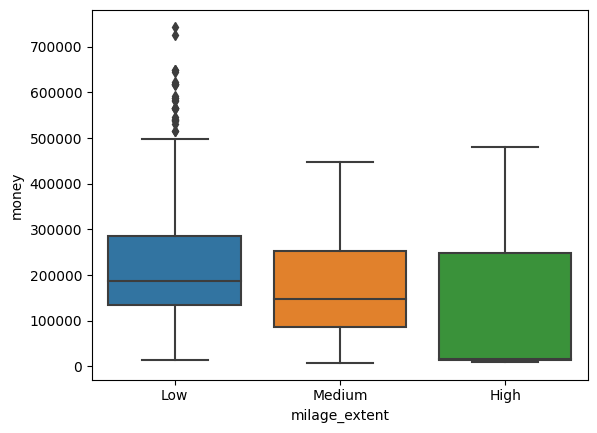

In [39]:
## Using a boxplot to check  

plot = sns.boxplot(x='milage_extent', y='money', data=new_df)

The above boxplot shows that the most expensive cars have a low milage.

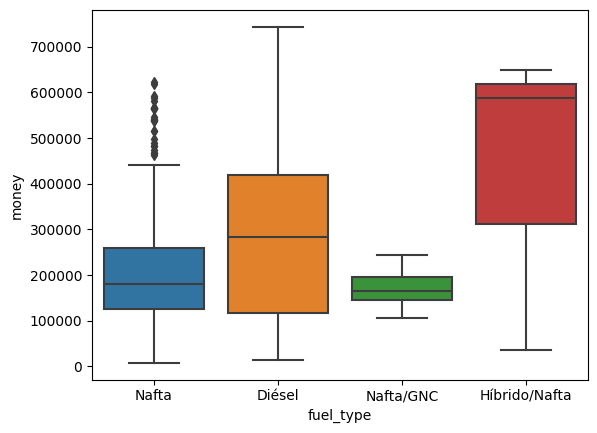

In [42]:
plot = sns.boxplot(x='fuel_type', y='money', data=new_df)

From the boxplot of price against fuel-type, the following observations can be made:
    
* Cars that run on diesel are the most expensive .
* The least expensive cars run on Nafta/GNC.
* The Nafta fuel-type contains several outliers when it comes to the price.


In [43]:
new_df.brand.value_counts()

Volkswagen       88
Ford             57
Chevrolet        51
Peugeot          49
Toyota           46
Renault          45
Citroën          32
Fiat             24
Jeep             20
Honda            18
Mercedes-Benz    14
BMW              13
Hyundai           9
Audi              8
Nissan            8
RAM               6
Dodge             4
Kia               3
Mini              2
Mitsubishi        2
DS                2
Volvo             2
Chery             1
Porsche           1
Subaru            1
Suzuki            1
Baic              1
Name: brand, dtype: int64

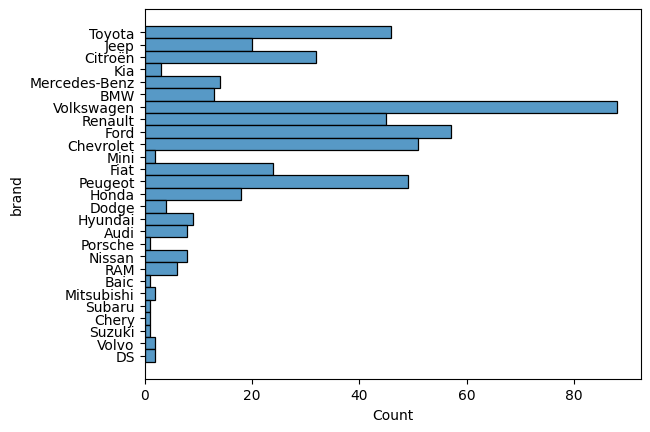

In [45]:
plot = sns.histplot(y=new_df.brand)

From the sample size, it can be deduced that most Argentines use Volkswagens.  

In [46]:
## Grouping the cars by fuel-type
df_grp = new_df[['fuel_type', 'money']]
df_grp.groupby('fuel_type', as_index=False).mean()

,fuel_type,money
0,Diésel,289155.969014
1,Híbrido/Nafta,424516.666667
2,Nafta,202085.391663
3,Nafta/GNC,168746.568421


In [48]:
df_grp1 = new_df[['body_type', 'money']]
df_grp1.groupby('body_type', as_index=False).mean()

,body_type,money
0,Coupé,136677.272727
1,Crossover,127400.000000
2,Furgón,228603.050000
3,Hatchback,159569.171174
4,Minivan,481000.000000
5,Monovolumen,201370.288889
6,Pick-Up,320168.395333
7,Rural,96066.666667
8,SUV,275120.194985
9,Sedán,189859.799469


The most expensive vehicles have a **Minivan** body_type while the least expensive ones have a **Rural** body_type

In [50]:
## Grouping vehicles according to both body-type and fuel-type
df_grp2 = new_df[['fuel_type', 'body_type', 'money']]
grouped_table = df_grp2.groupby(['fuel_type', 'body_type'], as_index=False).mean()

In [51]:
grouped_table

,fuel_type,body_type,money
0,Diésel,Furgón,305497.400000
1,Diésel,Hatchback,187213.000000
2,Diésel,Minivan,481000.000000
3,Diésel,Monovolumen,149326.666667
4,Diésel,Pick-Up,345492.866667
5,Diésel,SUV,122134.350000
6,Diésel,Sedán,185053.050000
7,Híbrido/Nafta,SUV,618280.000000
8,Híbrido/Nafta,Sedán,36990.000000
9,Nafta,Coupé,136677.272727


The most expensive combination is the **SUV(Híbrido/Nafta).** while the least expensive combination is the **SUV(Diésel)**

In [83]:
df_grp3 = new_df[['brand', 'money']]
df_grp3.groupby(['brand'], as_index=False).mean()

,brand,money
0,Audi,233690.550000
1,BMW,81219.230769
2,Baic,300560.000000
3,Chery,171600.000000
4,Chevrolet,195085.733333
5,Citroën,177032.187500
6,DS,538714.800000
7,Dodge,383890.000000
8,Fiat,164124.600000
9,Ford,233793.473684


The most expensive car brand is **the DS** while the least expensive one is **the BMW** 

In [53]:
grp_pivot = grouped_table.pivot(index='fuel_type', columns='body_type')
grp_pivot 

money                                               \
body_type              Coupé Crossover    Furgón      Hatchback   Minivan   
fuel_type                                                                   
Diésel                   NaN       NaN  305497.4  187213.000000  481000.0   
Híbrido/Nafta            NaN       NaN       NaN            NaN       NaN   
Nafta          136677.272727  127400.0  151708.7  159222.826989       NaN   
Nafta/GNC                NaN       NaN       NaN  160191.200000       NaN   

                                                                          \
body_type        Monovolumen        Pick-Up         Rural            SUV   
fuel_type                                                                  
Diésel         149326.666667  345492.866667           NaN  122134.350000   
Híbrido/Nafta            NaN            NaN           NaN  618280.000000   
Nafta          229927.966667  193546.038667  96066.666667  280659.241932   
Nafta/GNC      139183.200000            NaN           NaN  217100.000000   

                              
body_type              Sedán  
fuel_type                     
Diésel         185053.050000  
Híbrido/Nafta   36990.000000  
Nafta          192963.136723  
Nafta/GNC      178817.600000

In [54]:
grp_pivot.fillna(0)

money                                               \
body_type              Coupé Crossover    Furgón      Hatchback   Minivan   
fuel_type                                                                   
Diésel              0.000000       0.0  305497.4  187213.000000  481000.0   
Híbrido/Nafta       0.000000       0.0       0.0       0.000000       0.0   
Nafta          136677.272727  127400.0  151708.7  159222.826989       0.0   
Nafta/GNC           0.000000       0.0       0.0  160191.200000       0.0   

                                                                          \
body_type        Monovolumen        Pick-Up         Rural            SUV   
fuel_type                                                                  
Diésel         149326.666667  345492.866667      0.000000  122134.350000   
Híbrido/Nafta       0.000000       0.000000      0.000000  618280.000000   
Nafta          229927.966667  193546.038667  96066.666667  280659.241932   
Nafta/GNC      139183.200000       0.000000      0.000000  217100.000000   

                              
body_type              Sedán  
fuel_type                     
Diésel         185053.050000  
Híbrido/Nafta   36990.000000  
Nafta          192963.136723  
Nafta/GNC      178817.600000

### Exploring the relationship between the fuel-type and gear

Using the chi-square test one can test for the relationship between categorical variables specifically ordinal and nominal variables.

In [58]:
fuelVbody = pd.crosstab(new_df.fuel_type, new_df.gear)

In [59]:
fuelVbody

gear,Automática,Manual
fuel_type,,
Diésel,34,37
Híbrido/Nafta,3,0
Nafta,171,244
Nafta/GNC,3,16


In [61]:
## Using the chi square to establish whether a relationship exists between body-type and fuel-type
chi2, p_value, d_f, _ = stats.chi2_contingency(fuelVbody, correction=True)
print(f'The chi_square is {chi2}')
print(f'The p-value is {p_value}')
print(f'Degrees of freedom: {d_f}')

The chi_square is 10.607409812320535
The p-value is 0.014049699308681714
Degrees of freedom: 3


Since the p-value is less than 0.05 we can reject the null hypothesis and conclude that a relationship exists between the two variables.

#### Converting categorical variables with two specific categories into numeric variables ('One Hot Encoding')

In [64]:
## Converting the gear column to numeric values
new_gear = pd.get_dummies(new_df.gear)
new_gear

,Automática,Manual
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
505,1,0
506,1,0
507,0,1
508,1,0


In [65]:
pd.concat([new_df, new_gear], axis=1)

,money,brand,model,year,fuel_type,door,gear,motor,body_type,kilometres,milage_extent,Automática,Manual
0,538200.0,Toyota,Corolla Cross,2022,Nafta,5.0,Automática,2.4,SUV,500,Low,1,0
1,564200.0,Jeep,Compass,2022,Nafta,5.0,Automática,2.4,SUV,500,Low,1,0
2,35500.0,Jeep,Compass,2022,Nafta,5.0,Automática,2.4,SUV,500,Low,1,0
3,19000.0,Citroën,C4 Cactus,2022,Nafta,5.0,Automática,1.8,SUV,550,Low,1,0
4,301600.0,Toyota,Corolla,2019,Nafta,4.0,Manual,1.8,Sedán,9000,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,273000.0,Chevrolet,Tracker,2018,Nafta,5.0,Automática,1.8,SUV,52000,Low,1,0
506,46000.0,Volkswagen,Amarok,2019,Diésel,4.0,Automática,3.0,Pick-Up,49000,Low,1,0
507,205920.0,Peugeot,2008,2017,Nafta,5.0,Manual,1.6,SUV,75358,Low,0,1
508,44900.0,Volkswagen,Amarok,2019,Diésel,4.0,Automática,3.0,Pick-Up,57500,Low,1,0


## Task 6: Establishing correlation between the continuous variables

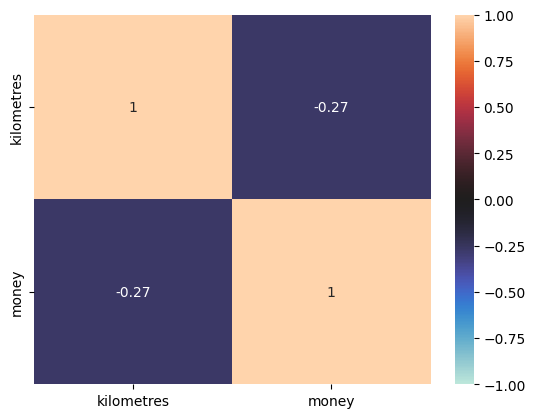

In [68]:
## Using heatmaps to establish correlation
plot = sns.heatmap(new_df[['kilometres', 'money']].corr(), annot=True, vmax=1, vmin=-1, center=0) 

In [71]:
## Using scipy.stats to find the pearson relation coefficient
pearson_coef, p_value = stats.pearsonr(new_df.kilometres, new_df.money)
print(f'The Pearson correlation coefficient is {pearson_coef}')
print(f'The p_value is {p_value}') 

The Pearson correlation coefficient is -0.2713120733223262
The p_value is 5.067969594646583e-10


The relationship between mileage and price is statistically significant although the correlation is weak to insignificant. Therefore, the mileage is a weak predictor of price. 

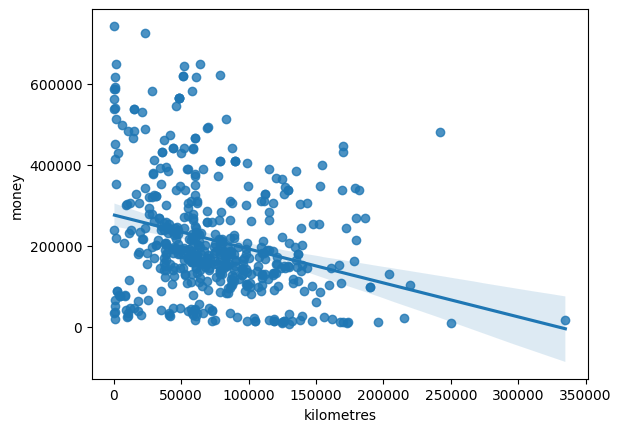

In [73]:
## Using regplot to reinforce this hypothesis
plot = sns.regplot(x='kilometres', y='money', data=new_df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8248b84f-cb77-428e-86c3-1b9a37c58650' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>